#**마케팅 캠페인 반응고객 예측**

문제상황과 데이터 살펴보기
문제해결 가설 정의[링크 텍스트](https://)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir('/content/drive/MyDrive/파이썬 데이터분석/개인 프로젝트/마케팅 데이터 분석')
os.getcwd()

Mounted at /content/drive


'/content/drive/MyDrive/파이썬 데이터분석/개인 프로젝트/마케팅 데이터 분석'

**문제상황 및 데이터 살펴보기**
 >문제상황
```
A마트는 온/오프라인으로 다양한 채널에서 고객 마케팅을 수행하고 있다.
두 채널에 대한 Mass 마케팅을 운영하다 보니 마케팅 비용이 과다하게
발생하고 있다. 마케팅 비용 절감을 위해 마케팅 반응 가능성이 높은 고객
대상으로 타겟 마케팅을 수행하고자 한다.
```

> **데이터 살펴보기**

* 마케팅 캠페인 관련 데이터
* 데이터 명세 ⬇

|ID|Year_Birth|Education|Marital_Status|Income|Kidhome|
|:---:|:---:|:---:|:---:|:---:|:---:|
|고객ID|출생년도|교육수준|결혼여부|수입|어린이명|
|Teenhome|Dt_Customer|Recency|MntWines|MntFruits|MntMeatProducts|
|청소년명|고객등록일|마지막구입일로부터 경과일|최근2년 와인구매량|최근2년 과일구매량|최근2년 고기구매량|
|MntFishProducts|MntSweetProducts|MntGoldProds|NumDealsPurchases|NumWebPurchases|NumCatalogPurchases|
|최근2년 생선구매량|최근2년 제과구매량|최근2년 보석구매량|할인 구매횟수|온라인 구매횟수|카탈로그이용 구매횟수|
|NumStorePurchases|NumWebVisitsMonth|AcceptedCmp3|AcceptedCmp4|AcceptedCmp5|AcceptedCmp1|
|오프라인구매횟수|월 웹사이트 방문횟수|3번째 캠페인 반응여부|4번째 캠페인 반응여부|5번째 캠페인 반응여부|1번째 캠페인 반응여부|
|AcceptedCmp2|Complain|Z_CostContact|Z_Revenue|Response|
|2번째 캠페인 반응여부|컴플레인 여부|고객연락비용|마케팅수익|최종 마케팅 반응여부|

In [4]:
import pandas as pd
df = pd.read_csv('marketing_campaign.csv', sep=';')
df.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0



# **문제해결 프로세스 정의**
---
> **문제정의**

```
▶ 온/오프라인 대상 Mass 마케팅으로 인한 마케팅 비용 과다 발생
```  

> **기대효과**

```
▶ 타겟 마케팅으로 마케팅 비용 절감
```

> **해결방안**

```
▶ 마케팅 반응 가능성 모델링을 통해 타겟 마케팅 수행
▶ Step 1 🥉
 - Data 전처리 및 고객 등록일, 시간 데이터 활용 전처리, 캠페인 반응률 분석
▶ Step 2 🥈
 - Numeric, Categorical 변수별 캠페인 반응률 분석
▶ Step 3 🥇
 - ML 알고리즘 활용 캠페인 반응 가능성이 높은 고객 예측
```

> **성과측정**  

```
▶ 타겟마케팅 전/후 마케팅 비용 대비 반응률
```

> **현업적용**  

```
▶ 매 월 Model에 Input하기 위한 Data mart 생성
▶ 매 월 Model을 활용하여 마케팅 가능 모수 추출
▶ 실험군 / 대조군 설정하여 마케팅 수행 후 반응률 Gap 검증
```


## · Step 1 데이터 전처리
---

In [5]:
print('df', df.shape)

df (2240, 29)


2240행과 29개의 컬럼으로 데이터 테이블이 구성되어있음


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [7]:
#null값 확인
print(df.isnull().sum())

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64


In [8]:
df['Income'].mean()

52247.25135379061

In [9]:
df['Income'].fillna(df['Income'].mean(), inplace=True)
#income에서의 null값은 평균값으로 치환
#소득데이터가 0이면 문제가 생길 수 있으므로

In [10]:
print(df.isnull().sum())

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64


데이터의 outlier확인

In [11]:
## rows 500
pd.set_option('display.max_rows', 500)

## columns
pd.set_option('display.max_columns', 500)

df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25037.797168,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35538.750000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51741.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68289.750000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


### · 고객등록일(Dt_Customer) 전처리
---
* 단순한 날짜로는 사용할 수 없는 col
* 몇 일이 경과되었는지에 대한 연속형 변수로 치환하여 사용

In [12]:
import datetime
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
df['Dt_Customer'].min(), df['Dt_Customer'].max()

(Timestamp('2012-07-30 00:00:00'), Timestamp('2014-06-29 00:00:00'))

In [13]:
df['Dt_Customer'] = df['Dt_Customer'].apply(lambda x : (df['Dt_Customer'].max() - x).days)
df.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,663,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,113,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,312,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,139,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,161,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


### · 캠페인 반응률 분석

In [14]:
df['Response'].value_counts()
#0:반응 안함 1:반응함

0    1906
1     334
Name: Response, dtype: int64

In [15]:
334 / (334 + 1906)
#평균 반응률 14%

0.14910714285714285

In [16]:
df_mkt = df[['AcceptedCmp5', 'AcceptedCmp4', 'AcceptedCmp3', 'AcceptedCmp2', 'AcceptedCmp1', 'Response']]
df_mkt.head(5)

,AcceptedCmp5,AcceptedCmp4,AcceptedCmp3,AcceptedCmp2,AcceptedCmp1,Response
0,0,0,0,0,0,1
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0


In [17]:
# ▶ 과거 캠페인 반응 여부에 대해 모두 더한 것을 새로운 Col로 정의
df_mkt['cmp_sum'] = df_mkt['AcceptedCmp5'] + df_mkt['AcceptedCmp4'] + df_mkt['AcceptedCmp3'] + df_mkt['AcceptedCmp2'] + df_mkt['AcceptedCmp1']
df_mkt.head(10)

<ipython-input-17-6628f9892b84>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mkt['cmp_sum'] = df_mkt['AcceptedCmp5'] + df_mkt['AcceptedCmp4'] + df_mkt['AcceptedCmp3'] + df_mkt['AcceptedCmp2'] + df_mkt['AcceptedCmp1']


,AcceptedCmp5,AcceptedCmp4,AcceptedCmp3,AcceptedCmp2,AcceptedCmp1,Response,cmp_sum
0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0
8,0,0,0,0,0,1,0
9,0,0,1,0,0,0,1


In [18]:
# ▶ 과거에 캠페인 반응을 많이 했던 고객일수록 다음 캠페인 반응률이 높을것으로 기대됨 (※ 매우 Critical한 변수)
df_mkt_gp = df_mkt.groupby('cmp_sum')['Response'].agg(['count','sum'])
df_mkt_gp['ratio'] = round((df_mkt_gp['sum'] / df_mkt_gp['count']) * 100, 1)
df_mkt_gp

,count,sum,ratio
cmp_sum,,,
0,1777,146,8.2
1,325,101,31.1
2,83,42,50.6
3,44,35,79.5
4,11,10,90.9


## · **Step 2 변수별 캠페인 반응률**  
---


In [19]:
df.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,663,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,113,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,312,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,139,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,161,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [20]:
# ▶ numeric, categorical value 나누기
numeric_list=[]
categoical_list=[]

for i in df.columns :
  if df[i].dtypes == 'O' :
    categoical_list.append(i)
  else :
    numeric_list.append(i)

print("categoical_list :", categoical_list)
print("numeric_list :", numeric_list)

categoical_list : ['Education', 'Marital_Status']
numeric_list : ['ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response']


### · Numeric 변수
---

<ipython-input-21-b0d0addbcba5>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Dt_Customer']);


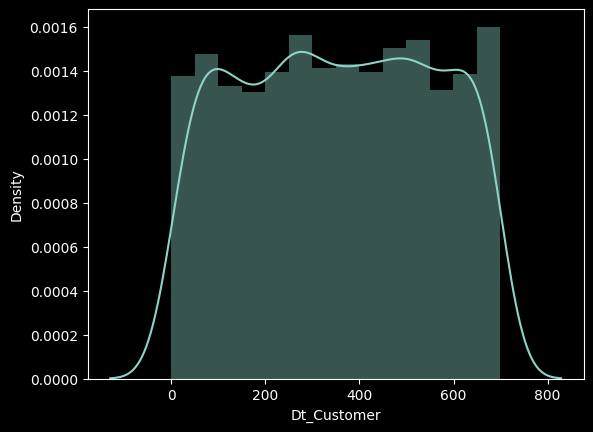

In [21]:
# ▶ 고객등록일(Dt_Customer) 분포 확인
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use(['dark_background'])

sns.distplot(df['Dt_Customer']);

In [22]:
# ▶ 구간화
import numpy as np
df['Dt_Customer_gp'] = np.where (df['Dt_Customer'] <= 200, 1,
                           np.where(df['Dt_Customer'] <= 500, 2, 3))

df[['Dt_Customer','Dt_Customer_gp']]

,Dt_Customer,Dt_Customer_gp
0,663,3
1,113,1
2,312,2
3,139,1
4,161,1
...,...,...
2235,381,2
2236,19,1
2237,155,1
2238,156,1


In [23]:
df_gp = df.groupby('Dt_Customer_gp')['Response'].agg(['count','sum'])
df_gp['ratio'] = round((df_gp['sum'] / df_gp['count']) * 100, 1)
df_gp

,count,sum,ratio
Dt_Customer_gp,,,
1,618,52,8.4
2,980,121,12.3
3,642,161,25.1


<ipython-input-24-0ff45731f770>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Recency'])


<Axes: xlabel='Recency', ylabel='Density'>

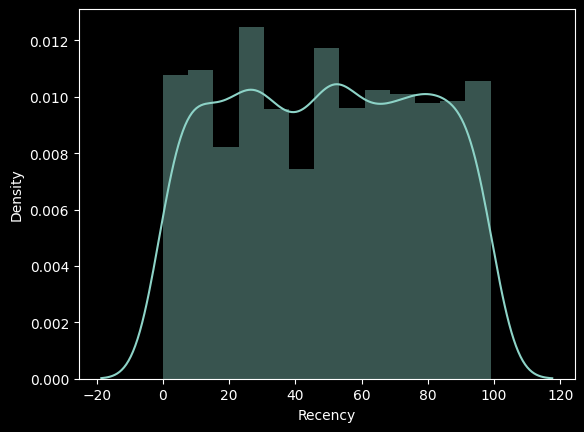

In [24]:
sns.distplot(df['Recency'])

In [25]:
# ▶ 구간화
import numpy as np
df['Recency_gp'] = np.where (df['Recency'] <= 35, 1,
                           np.where(df['Recency'] <= 65, 2, 3))

df[['Recency','Recency_gp']]

,Recency,Recency_gp
0,58,2
1,38,2
2,26,1
3,26,1
4,94,3
...,...,...
2235,46,2
2236,56,2
2237,91,3
2238,8,1


In [26]:
df_gp = df.groupby('Recency_gp')['Response'].agg(['count','sum'])
df_gp['ratio'] = round((df_gp['sum'] / df_gp['count']) * 100, 1)
df_gp

,count,sum,ratio
Recency_gp,,,
1,820,190,23.2
2,674,84,12.5
3,746,60,8.0


In [27]:
# ▶ kidhome 분석
df_gp = df.groupby('Kidhome')['Response'].agg(['count','sum'])
df_gp['ratio'] = round((df_gp['sum'] / df_gp['count']) * 100, 1)
df_gp

,count,sum,ratio
Kidhome,,,
0,1293,222,17.2
1,899,110,12.2
2,48,2,4.2


### · Categorical 변수
---

In [28]:
print("categoical_list :", categoical_list)

categoical_list : ['Education', 'Marital_Status']


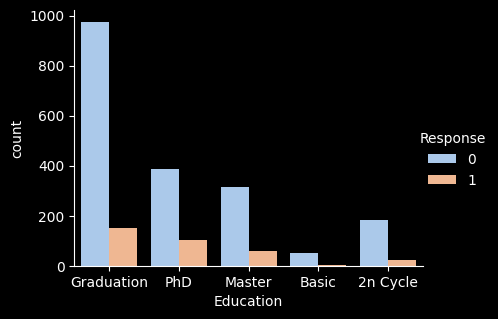

In [35]:
# ▶ 교육수준에 따른 캠페인 반응률 뷴석
sns.catplot(x="Education", hue="Response", kind="count", data=df,palette="pastel");
plt.gcf().set_size_inches(5, 3)

In [36]:
df_gp = df.groupby('Education')['Response'].agg(['count','sum'])
df_gp['ratio'] = round((df_gp['sum'] / df_gp['count']) * 100, 1)
df_gp.sort_values(by=['ratio'],ascending = False)

,count,sum,ratio
Education,,,
PhD,486,101,20.8
Master,370,57,15.4
Graduation,1127,152,13.5
2n Cycle,203,22,10.8
Basic,54,2,3.7


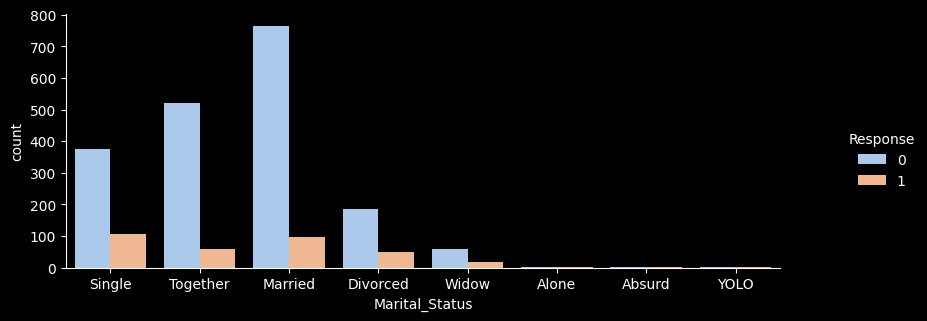

In [39]:
# ▶ 결혼 여부에 따른 캠페인 반응률 분석
sns.catplot(x="Marital_Status", hue="Response", kind="count",palette="pastel",data=df);
plt.gcf().set_size_inches(10, 3)

In [42]:
df_gp = df.groupby('Marital_Status')['Response'].agg(['count','sum'])
df_gp['ratio'] = round((df_gp['sum']/df_gp['count'])*100,1)
df_gp.sort_values(by=['ratio'],ascending = False)

,count,sum,ratio
Marital_Status,,,
Absurd,2,1,50.0
YOLO,2,1,50.0
Alone,3,1,33.3
Widow,77,19,24.7
Single,480,106,22.1
Divorced,232,48,20.7
Married,864,98,11.3
Together,580,60,10.3


In [43]:
df.head(3)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Dt_Customer_gp,Recency_gp
0,5524,1957,Graduation,Single,58138.0,0,0,663,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,3,2
1,2174,1954,Graduation,Single,46344.0,1,1,113,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,1,2
2,4141,1965,Graduation,Together,71613.0,0,0,312,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,2,1


In [44]:
# ▶ 새로운 파생 변수 생성 (1)
df['cmp_sum'] = df['AcceptedCmp5'] + df['AcceptedCmp4'] + df['AcceptedCmp3'] + df['AcceptedCmp2'] + df['AcceptedCmp1']
df.head(2)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Dt_Customer_gp,Recency_gp,cmp_sum
0,5524,1957,Graduation,Single,58138.0,0,0,663,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,3,2,0
1,2174,1954,Graduation,Single,46344.0,1,1,113,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,1,2,0


##  · **Step 3 ML 활용 마케팅 반응고객 예측**  
---


In [45]:
# ▶ 새로운 파생 변수 생성 (2)
df['mnt_sum'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']
df.head(3)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Dt_Customer_gp,Recency_gp,cmp_sum,mnt_sum
0,5524,1957,Graduation,Single,58138.0,0,0,663,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,3,2,0,1617
1,2174,1954,Graduation,Single,46344.0,1,1,113,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,1,2,0,27
2,4141,1965,Graduation,Together,71613.0,0,0,312,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,2,1,0,776


In [46]:
# ▶ 모델링을 학습하기 위한 Fearue(X)와 Y데이터를 구분하는 단계
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

X=df.drop(['ID', 'Response', 'Z_CostContact', 'Z_Revenue', 'Dt_Customer_gp', 'Recency_gp'], axis=1)
Y=df['Response']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, stratify=Y)

print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(1568, 27)
(1568,)
(672, 27)
(672,)


In [47]:
print(categoical_list)

['Education', 'Marital_Status']


In [48]:
from sklearn.preprocessing import LabelEncoder

for col in categoical_list:
    print(col)
    le = LabelEncoder()
    le.fit(list(x_train[col].values) + list(x_test[col].values))
    x_train[col] = le.transform(x_train[col])
    x_test[col] = le.transform(x_test[col])

Education
Marital_Status


In [49]:
x_test[categoical_list].head(5)

,Education,Marital_Status
1407,3,3
1160,2,3
1623,2,4
408,4,5
329,4,4


In [50]:
import lightgbm as lgb
# ▶ setting the parameters

d_train = lgb.Dataset (x_train, label = y_train)

params = {}
params [ 'learning_rate'] = 0.1
params [ 'boosting_type'] = 'gbdt' # GradientBoostingDecisionTree
params ['objective'] = 'binary'
params [ 'metric' ] = 'binary_logloss' # metric for multi-class
params [ 'max_depth'] = 2
params [ 'num_leaves' ] = 4
params ['seed'] = 23456
# ▶ 학습
clf = lgb.train (params, d_train, 500) # 500 epocs에서 모델 훈련

[LightGBM] [Info] Number of positive: 234, number of negative: 1334
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.069074 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2025
[LightGBM] [Info] Number of data points in the train set: 1568, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.149235 -> initscore=-1.740616
[LightGBM] [Info] Start training from score -1.740616
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

In [51]:
from sklearn.metrics import classification_report

y_pred_train = clf.predict(x_train)
for i in range(0,len(y_pred_train)):
    if y_pred_train[i]>=.5:       # setting threshold to .5
       y_pred_train[i]=1
    else:
       y_pred_train[i]=0

y_pred_test = clf.predict(x_test)
for i in range(0,len(y_pred_test)):
    if y_pred_test[i]>=.5:       # setting threshold to .5
       y_pred_test[i]=1
    else:
       y_pred_test[i]=0



print(classification_report(y_train, y_pred_train))
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1334
           1       0.98      0.85      0.91       234

    accuracy                           0.97      1568
   macro avg       0.98      0.92      0.95      1568
weighted avg       0.97      0.97      0.97      1568

              precision    recall  f1-score   support

           0       0.91      0.94      0.92       572
           1       0.57      0.48      0.52       100

    accuracy                           0.87       672
   macro avg       0.74      0.71      0.72       672
weighted avg       0.86      0.87      0.86       672



In [52]:
pd.Series(y_pred_test).value_counts()

0.0    588
1.0     84
dtype: int64

In [53]:
# ▶ 과적합 문제, Train과 Test set에 성능을 최대한 줄여주는 것이 과적합을 방지
from sklearn.metrics import roc_auc_score

y_pred_train_proba = clf.predict(x_train)
y_pred_test_proba = clf.predict(x_test)


roc_score_train = roc_auc_score(y_train, y_pred_train_proba)
roc_score_test = roc_auc_score(y_test, y_pred_test_proba)

print("roc_score_train :", roc_score_train)
print("roc_score_test :", roc_score_test)

roc_score_train : 0.9972866131037046
roc_score_test : 0.8895017482517483


In [54]:
from sklearn.metrics import roc_curve
def roc_curve_plot(y_test , pred_proba_c1):
    # ▶임곗값에 따른 FPR, TPR 값을 반환 받음.
    fprs , tprs , thresholds = roc_curve(y_test ,pred_proba_c1)

    # ▶ROC Curve를 plot 곡선으로 그림.
    plt.plot(fprs , tprs, label='ROC')
    # ▶가운데 대각선 직선을 그림.
    plt.plot([0, 1], [0, 1], 'k--', label='Random', color='red')

    # ▶FPR X 축의 Scale을 0.1 단위로 변경, X,Y 축명 설정등
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Sensitivity )')
    plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()

<ipython-input-54-d06ed50e85b4>:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--', label='Random', color='red')


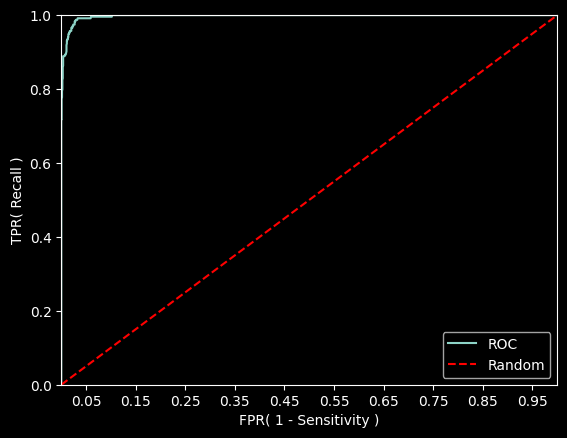

In [55]:
roc_curve_plot(y_train, y_pred_train_proba)

<ipython-input-54-d06ed50e85b4>:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--', label='Random', color='red')


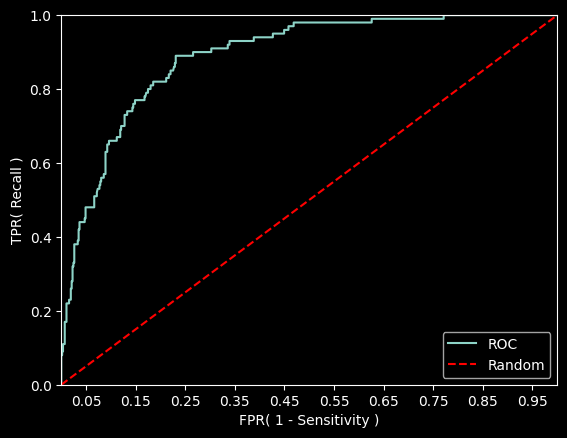

In [56]:
roc_curve_plot(y_test, y_pred_test_proba)

### · 중요 변수 파악
---
* Feature IMP 분석을 통한 중요변수 파악

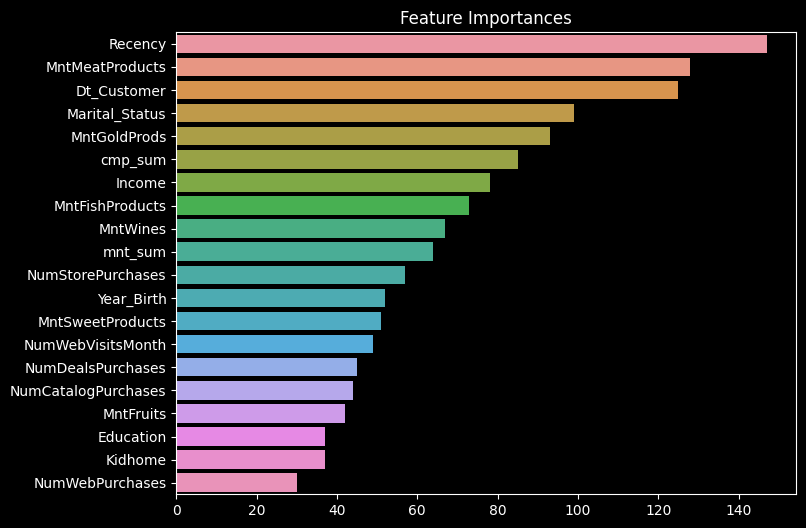

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use(['dark_background'])

ftr_importances_values = clf.feature_importance() # Randomforest : feature_importance_
ftr_importances = pd.Series(ftr_importances_values, index = X.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature Importances')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

In [58]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Dt_Customer_gp', 'Recency_gp', 'cmp_sum', 'mnt_sum'],
      dtype='object')

<ipython-input-59-cd3ef61376f2>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Income']);


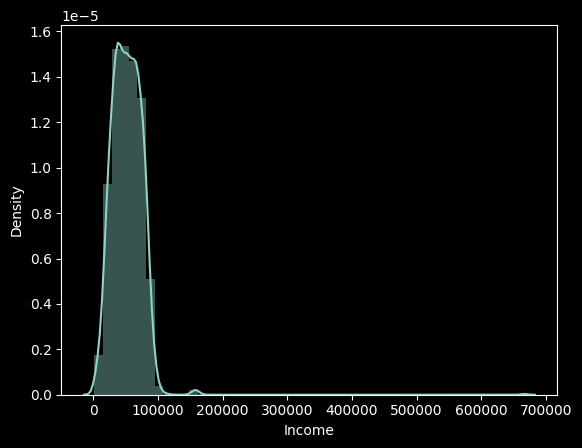

In [59]:
# ▶ distplot
sns.distplot(df['Income']);

In [60]:
# ▶ 변수 해석 빠르게 하기
import numpy as np

val = 'Income'
sp1 = 30000
sp2 = 60000

# ------------------------------------------------------------

df['gp'] = np.where (df[val] <= sp1, 1,
                           np.where(df[val] <= sp2, 2, 3))

df_gp = df.groupby('gp')['Response'].agg(['count','sum'])
df_gp['ratio'] = round((df_gp['sum'] / df_gp['count']) * 100, 1)
df_gp.sort_values(by=['ratio'], ascending = False)

,count,sum,ratio
gp,,,
3,841,181,21.5
2,1029,114,11.1
1,370,39,10.5


In [61]:
import pickle
# 모델 저장
saved_model = pickle.dumps(clf)

# 모델 Read
clf_from_pickle = pickle.loads(saved_model)